In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import  LogisticRegression
from sklearn import  metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectPercentile


# EXploration Data

In [2]:
df=pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

In [3]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.duplicated().sum()

240

Rename ALL Columns.

In [6]:
df.rename(columns={'fixed acidity':'fixedacidity','volatile acidity':'volatileacidity','citric acid':'citricacid','residual sugar':'residualsugar','free sulfur dioxide':'freesulfurdioxide','total sulfur dioxide':'totalsulfurdioxide'},inplace=True)

In [7]:
df.head(5)

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df['fixedacidity'].value_counts()

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixedacidity, Length: 96, dtype: int64

In [9]:
id_counts=df['fixedacidity'].value_counts()

In [10]:
id_counts.value_counts()

1     11
4      7
2      6
3      6
5      5
26     4
14     4
12     3
17     3
7      3
9      3
10     3
16     2
13     2
19     2
42     2
44     2
6      2
46     2
11     1
20     1
15     1
8      1
67     1
21     1
37     1
53     1
52     1
50     1
49     1
45     1
40     1
38     1
34     1
22     1
33     1
29     1
28     1
27     1
25     1
24     1
57     1
23     1
Name: fixedacidity, dtype: int64

In [11]:
df_mask=id_counts==1

In [12]:
sum(df_mask)

11

In [13]:
df_feature=id_counts.index[df_mask]
df_feature=list(df_feature)

In [14]:
df_feature[:3]

[12.1, 4.9, 15.9]

In [15]:
df.loc[df['fixedacidity'].isin(df_feature[0:5]),:].head(5)

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4
544,14.3,0.31,0.74,1.8,0.075,6.0,15.0,1.00080,2.86,0.79,8.4,6
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5
664,12.1,0.40,0.52,2.0,0.092,15.0,54.0,1.00000,3.03,0.66,10.2,5
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7


In [16]:
feature_duplicated_id=df.columns.tolist()

In [17]:
df.loc[df.duplicated(subset=feature_duplicated_id)].head(5)

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.9966,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.9978,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.9962,3.41,0.39,10.9,5


In [18]:
df['quality'].value_counts()


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [19]:
for line in range(len(df['quality'])):
  if df.quality[line]  <=6 :
    df.quality[line]=0
  else:
    df.quality[line]=1


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [20]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [21]:
df.head(5)

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


# CORRELLATION

In [22]:
corr=df.corr()
corr.iloc[0:5,0:5]

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides
fixedacidity,1.000000,-0.256131,0.671703,0.114777,0.093705
volatileacidity,-0.256131,1.000000,-0.552496,0.001918,0.061298
citricacid,0.671703,-0.552496,1.000000,0.143577,0.203823
residualsugar,0.114777,0.001918,0.143577,1.000000,0.055610
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000


<AxesSubplot:>

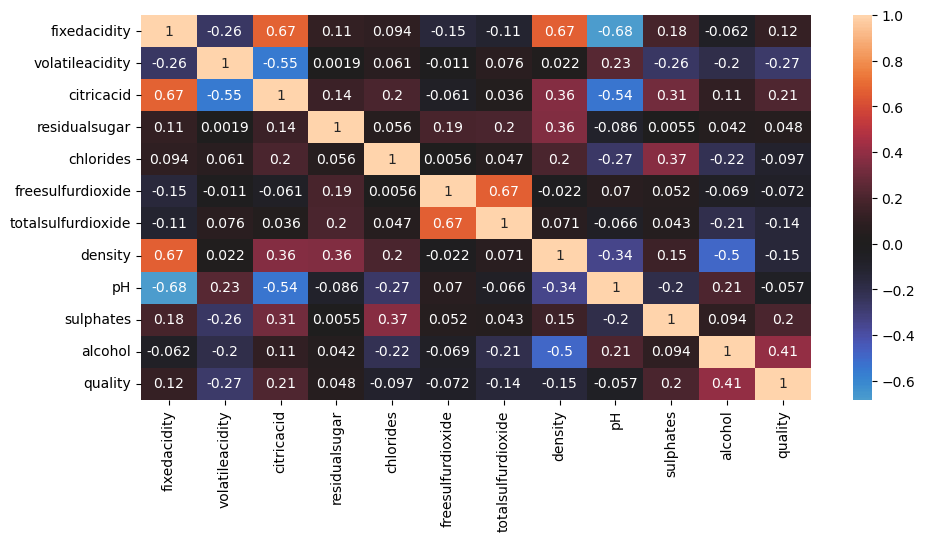

In [23]:
plt.figure(figsize=(10.8,5))
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,center=0,annot=True)

# SOME DATA VIZ.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Quality/volatileacidity')

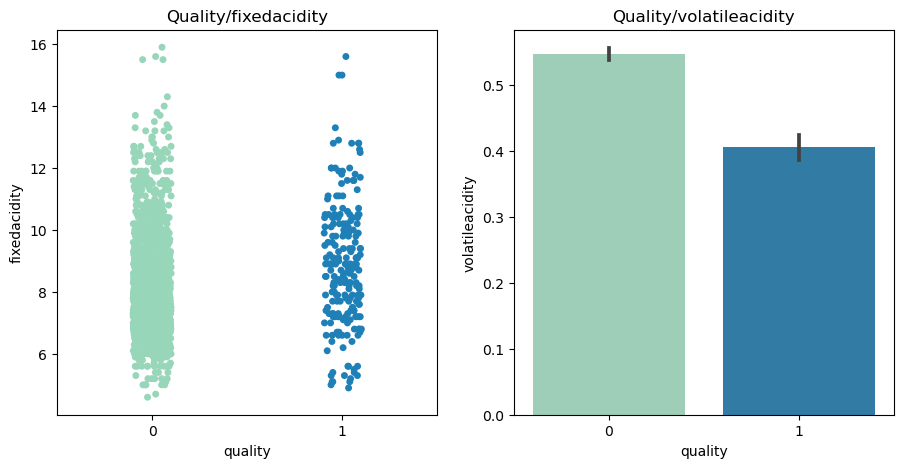

In [24]:
plt.figure(figsize=(10.8,5))
plt.subplot(1,2,1)
sns.stripplot(x='quality',y='fixedacidity',data=df,palette='YlGnBu')
plt.title('Quality/fixedacidity')

plt.subplot(1,2,2)
sns.barplot(x='quality',y='volatileacidity',data=df,palette='YlGnBu')
plt.title('Quality/volatileacidity')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Quality/residualsugar')

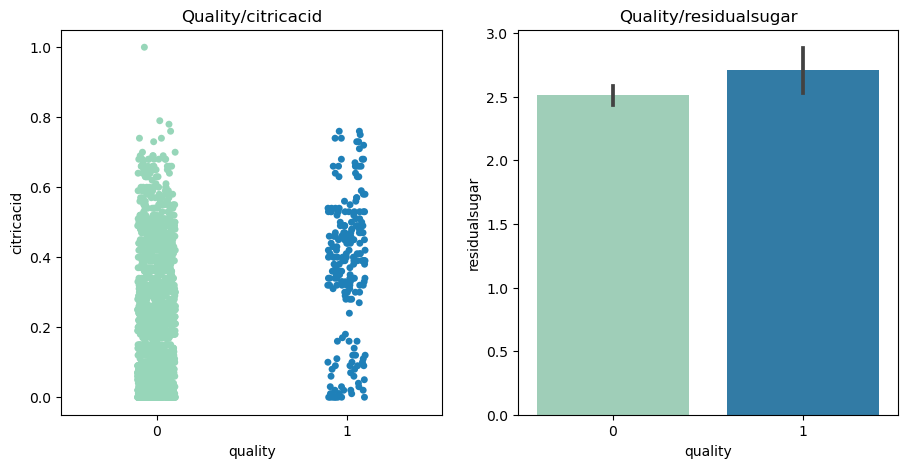

In [25]:
plt.figure(figsize=(10.8,5))
plt.subplot(1,2,1)
sns.stripplot(x='quality',y='citricacid',data=df,palette='YlGnBu')
plt.title('Quality/citricacid')

plt.subplot(1,2,2)
sns.barplot(x='quality',y='residualsugar',data=df,palette='YlGnBu')
plt.title('Quality/residualsugar')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  del sys.path[0]


Text(0.5, 1.0, 'Quality/alcohol')

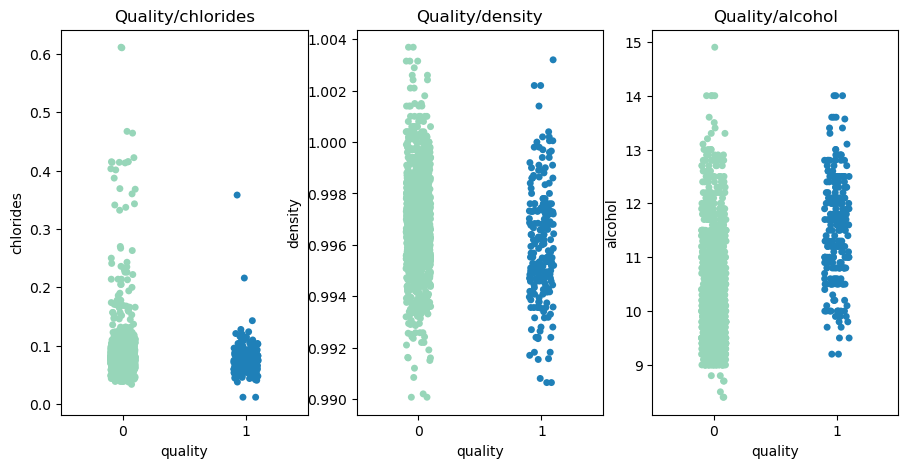

In [26]:
plt.figure(figsize=(10.8,5))

plt.subplot(1,3,1)
sns.stripplot(x='quality',y='chlorides',data=df,palette='YlGnBu')
plt.title('Quality/chlorides')

plt.subplot(1,3,2)
sns.stripplot(x='quality',y='density',data=df,palette='YlGnBu')
plt.title('Quality/density')


plt.subplot(1,3,3)
sns.stripplot(x='quality',y='alcohol',data=df,palette='YlGnBu')
plt.title('Quality/alcohol')



# SELECTION BEST FEATURE

In [27]:
itens_to_remove=['totalsulfurdioxide','pH','sulphates','freesulfurdioxide']


In [28]:
feature=df.columns.tolist()
feature

['fixedacidity',
 'volatileacidity',
 'citricacid',
 'residualsugar',
 'chlorides',
 'freesulfurdioxide',
 'totalsulfurdioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [29]:
feature=[item for item in feature if item not in itens_to_remove]

In [30]:
feature

['fixedacidity',
 'volatileacidity',
 'citricacid',
 'residualsugar',
 'chlorides',
 'density',
 'alcohol',
 'quality']

In [31]:
X=df[feature].iloc[:,:-1].values
y=df[feature].iloc[:,-1].values

print(X.shape,y.shape)

(1599, 7) (1599,)


In [32]:
[f_stat,_p_value]=f_classif(X,y)

In [33]:
data=pd.DataFrame({'Features':feature[:-1],'Static':f_stat,'P_value':_p_value})

In [34]:
data[['Features','Static','P_value']].sort_values(by='Static',ascending=False)

,Features,Static,P_value
6,alcohol,317.650903,6.016774e-65
1,volatileacidity,126.290916,2.957863e-28
2,citricacid,77.184567,3.934780e-18
5,density,36.990465,1.482554e-09
0,fixedacidity,23.356885,1.474869e-06
4,chlorides,15.266188,9.727196e-05
3,residualsugar,3.654017,5.611296e-02


In [35]:
selector=SelectPercentile(f_classif,percentile=50)

In [36]:
selector.fit(X,y)

SelectPercentile(percentile=50)

In [37]:
best_itrx=selector.get_support()

In [38]:
best_itrx

array([False,  True,  True, False, False, False,  True])

In [39]:
features=feature[:-1]

In [40]:
best_feature=[features[counter] for counter in range(len(features)) if best_itrx[counter]]

In [41]:
best_feature

['volatileacidity', 'citricacid', 'alcohol']

In [42]:
C_vals_exponent=np.linspace(-3,3,13)

In [43]:
C_vals=np.float(10)**C_vals_exponent
C_vals

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03])

In [44]:
Alist=[]
for cv_counter in range(len(C_vals)):
  Alist.append(cv_counter)



In [45]:
j=random.choice(Alist)

In [46]:
j

12

In [47]:
model_x=LogisticRegression(solver='saga',penalty='l1',max_iter=1000,C=j)

In [48]:
X_train,X_test,y_train,y_test=train_test_split(df['volatileacidity'].values.reshape(-1,1),df['quality'].values,test_size=0.2,random_state=24)

In [49]:
df['quality'].mean()

0.1357098186366479

In [50]:
np.mean(y_test)
np.mean(y_train)

0.1344800625488663

In [51]:
model_x.fit(X_train,y_train)

LogisticRegression(C=12, max_iter=1000, penalty='l1', solver='saga')

In [52]:
y_pred=model_x.predict(X_test)

In [53]:
is_correct=y_pred==y_test

In [54]:
np.mean(is_correct)

0.859375

In [55]:
y_proba=model_x.predict_proba(X_test)

In [56]:
metrics.roc_auc_score(y_test,y_proba[:,1])

0.7606868686868687

In [57]:
ftp,tpr,thresholds=metrics.roc_curve(y_test,y_proba[:,1])

Text(0.5, 0, 'fpr')

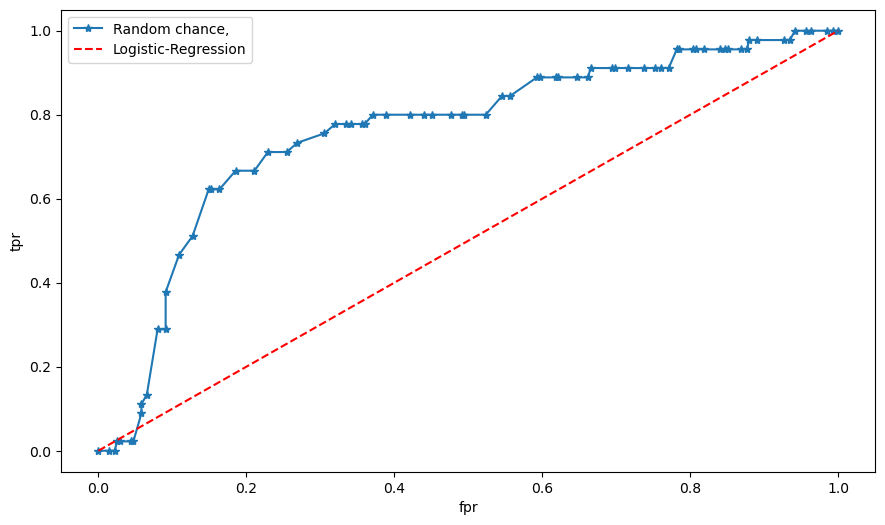

In [58]:
plt.figure(figsize=(10.5,6))
plt.plot(ftp,tpr,'*-')
plt.plot([0,1],[0,1],'r--')
plt.legend(['Random chance,','Logistic-Regression'])
plt.ylabel('tpr')
plt.xlabel('fpr')

In [59]:
precision,recall,thresh=metrics.precision_recall_curve(y_test,y_proba[:,1])

In [60]:
metrics.auc(recall, precision)

0.2947897380156972